# Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки `pandas`, `numpy` и `matplotlib`.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки `sklearn`.
Создайте датафреймы `X` и `y` из этих данных.
Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.
Масштабируйте данные с помощью `StandardScaler`.
Постройте модель `TSNE` на тренировочный данных с параметрами:
```
    n_components=2,
    learning_rate=250,
    random_state=42
```
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [4]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [6]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [7]:
from sklearn.manifold import TSNE

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


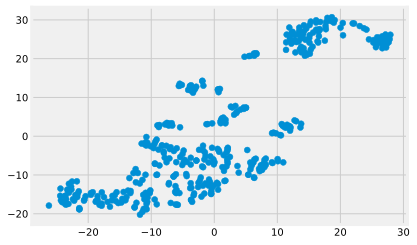

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма `X_train`.
Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`, и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения `price` и `CRIM` в разных кластерах.

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [12]:
labels_trains = kmeans.fit_predict(X_train_scaled)

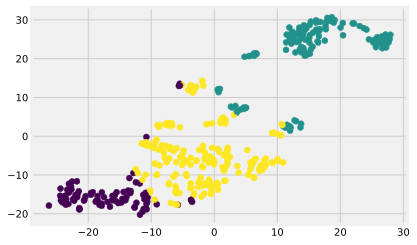

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_trains)
plt.show()

In [25]:
def print_mean_by_clusters(X, y, labels, X_columns, y_column):
    for cluster in np.unique(labels):
        print('For cluster {}:'.format(cluster))
        print('\t{}:\t{};'.format(y_column, '%0.2f' % y.loc[labels==cluster, y_column].mean()))
        for X_column in X_columns:
              print('\t{}:\t{};'.format(X_column, '%0.2f' % X.loc[labels==cluster, X_column].mean()))

In [26]:
print_mean_by_clusters(X_train, y_train, labels_trains, X_columns=['CRIM'], y_column='price')

For cluster 0:
	price:	27.79;
	CRIM:	0.07;
For cluster 1:
	price:	16.17;
	CRIM:	10.80;
For cluster 2:
	price:	24.96;
	CRIM:	0.42;


### * Задание 3

Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора. 
Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [27]:
labels_tests = kmeans.predict(X_test_scaled)

In [28]:
print_mean_by_clusters(X_test, y_test, labels_tests, X_columns=['CRIM'], y_column='price')

For cluster 0:
	price:	31.35;
	CRIM:	0.06;
For cluster 1:
	price:	16.44;
	CRIM:	10.17;
For cluster 2:
	price:	21.86;
	CRIM:	0.27;
